In [23]:
# Run this cell before continuing.
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)

# Examining Correlations between location and crime Rates

## Introduction
---

Recently, the rates of crimes in the east of Vancouver have surged, prompting an exploration into the extent of this increase. Downtown Vancouver and Hastings Street have frequently been labeled as high crime areas according to many news sources. Factors such as socioeconomic inequality and poverty in East Vancouver are associated with higher crime rates, which seem to contribute to an elevated crime rate compared to the Westside. 
Our dataset contains crime data for 2022 in Vancouver. This report will focus on three types of crime: "Break and Enter Residential/Other," "Break and Enter Commercial," and "Mischief." The dataset also has information about the crime's date and time, address, neighbourhood, and geographic coordinates.


### Parameters of Interest:

* Location Parameter (Proportion): 

H0: p_east >= 0.67

H1: p_east < 0.67

* Scale Parameter (Standard Deviation):

The standard deviation will be a secondary parameter of interest. We'll calculate the standard deviation for each crime type in both west and east sides of Vancouver. This parameter is important because it allows us to assess the variability or dispersion of crime occurrences within each group. It can help us understand how consistent or variable crime patterns are in each area.

### Research Question 
The basis of our report is to answer whether crime rates in the East of Vancouver are at least two times more than those in the West, as defined by the "X" coordinate. 


## Preliminary Results
---

In [24]:
# setwd("/home/jovyan/work/project")

In [25]:
crime_data <- read_csv("https://raw.githubusercontent.com/aradsab/Stat-201-Project/main/crimedata_csv_AllNeighbourhoods_2022.csv")
# cleaning the data
crime_data <- crime_data[complete.cases(crime_data), ]
crime_data <- subset(crime_data, X != 0)
crime_data <- crime_data %>%
  mutate(REGION = ifelse(X > 491017.47, "East", "West"))

head(crime_data)

Rows: 34281 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,REGION
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
Break and Enter Commercial,2022,1,3,16,19,10XX ALBERNI ST,West End,491036.1,5459146,East
Break and Enter Commercial,2022,6,17,5,16,10XX ALBERNI ST,West End,491067.3,5459115,East
Break and Enter Commercial,2022,3,15,5,14,10XX ALBERNI ST,West End,491102.2,5459092,East
Break and Enter Commercial,2022,3,19,6,42,10XX ALBERNI ST,West End,491102.2,5459092,East
Break and Enter Commercial,2022,2,23,23,0,10XX BALFOUR AVE,Shaughnessy,490699.8,5455444,West
Break and Enter Commercial,2022,2,25,10,15,10XX BALFOUR AVE,Shaughnessy,490699.8,5455444,West


In [26]:
crime_X <- crime_data[c("REGION","TYPE")]
head(crime_X)

REGION,TYPE
<chr>,<chr>
East,Break and Enter Commercial
East,Break and Enter Commercial
East,Break and Enter Commercial
East,Break and Enter Commercial
West,Break and Enter Commercial
West,Break and Enter Commercial


In [27]:
set.seed(124)

crime_res <- crime_X[crime_X$TYPE == "Break and Enter Residential/Other", ]
crime_com <- crime_X[crime_X$TYPE == "Break and Enter Commercial", ]
crime_mis <- crime_X[crime_X$TYPE == "Mischief", ]

crime_res_summary <- crime_res %>% group_by(REGION) %>% summarise(total_rows = n()) %>%
    mutate(proportion = total_rows / sum(total_rows))
crime_com_summary <- crime_com %>% group_by(REGION) %>% summarise(total_rows = n()) %>%
    mutate(proportion = total_rows / sum(total_rows))
crime_mis_summary <- crime_mis %>% group_by(REGION) %>% summarise(total_rows = n()) %>%
    mutate(proportion = total_rows / sum(total_rows))

In [28]:
tibble(crime_res_summary)

REGION,total_rows,proportion
<chr>,<int>,<dbl>
East,801,0.6327014
West,465,0.3672986


Break & Enter Residential sample proportions

In [29]:
tibble(crime_com_summary)

REGION,total_rows,proportion
<chr>,<int>,<dbl>
East,1344,0.6770781
West,641,0.3229219


Break & Enter Commercial sample proportions

In [30]:
tibble(crime_mis_summary)

REGION,total_rows,proportion
<chr>,<int>,<dbl>
East,4349,0.7746705
West,1265,0.2253295


Mischeif sample proportions

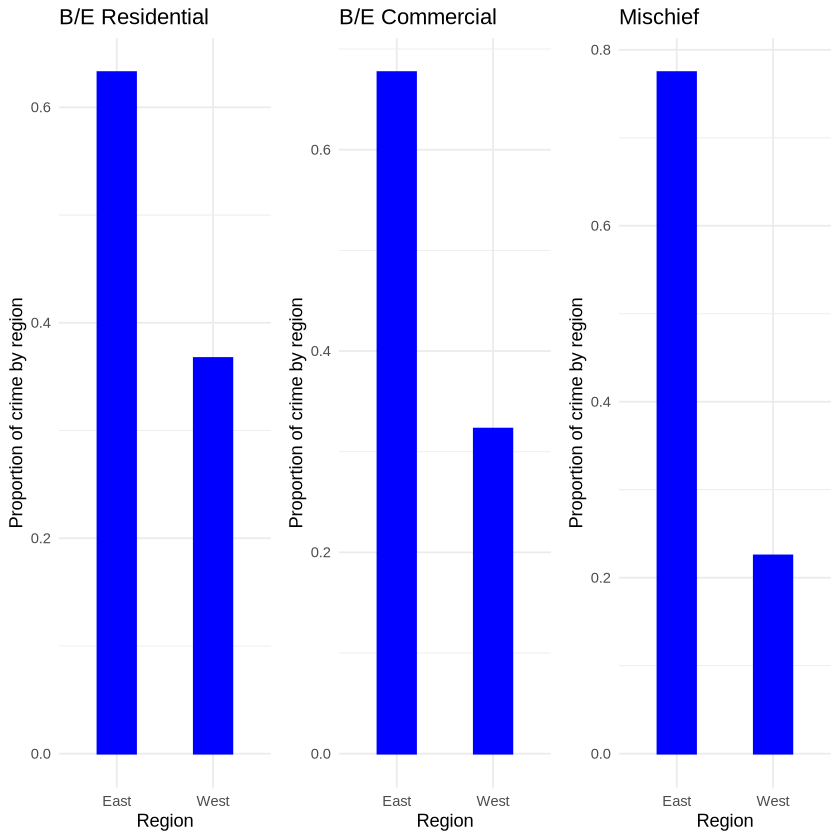

In [31]:
crime_res_plot <- crime_res_summary %>%
  ggplot(aes(x = REGION, y = proportion)) +
  geom_bar(stat = "identity", color = "blue", fill = "blue",width = 0.4) +
  xlab("Region") +
  ylab("Proportion of crime by region") +
  ggtitle("B/E Residential")


crime_com_plot <- crime_com_summary %>%
  ggplot(aes(x = REGION, y = proportion)) +
  geom_bar(stat = "identity", color = "blue", fill = "blue",width = 0.4) +
  xlab("Region") +
  ylab("Proportion of crime by region") +
  ggtitle("B/E Commercial")

crime_mis_plot <- crime_mis_summary %>%
  ggplot(aes(x = REGION, y = proportion)) +
  geom_bar(stat = "identity", color = "blue", fill = "blue",width = 0.4) +
  xlab("Region") +
  ylab("Proportion of crime by region") +
  ggtitle("Mischief")

combined_plot <- plot_grid(
  crime_res_plot + theme_minimal(),  
  crime_com_plot + theme_minimal(),
  crime_mis_plot + theme_minimal(),
  ncol = 3)
combined_plot

## Methods: Plan

---

### Data Preparation and Tidying
To begin the analysis, we modified the original database to only contain entries for our three specified crimes: "Break and Enter Residential/Other", "Break and Enter Commercial" and "Mischief". Then the data was separated into three databases for each of their categories based on type of crime. 
A new column, “REGION” was created to find the proportion of crimes in the East and the West. Crimes with "X" values less than 491017.47 are categorized as the "west" side, while values greater than or equal to this threshold are considered the "east" side. This approach allows us to focus on the geographical aspect of crime patterns for "Break and Enter Residential/Other", "Break and Enter Commercial" and "Mischief" incidents.
### Changing of Hypothesis Based on Feedback
The initial null hypothesis from our project proposal was that crime rates are evenly split between the East and West. However, after some consideration and reflection of our own real-world experiences, we believe that the proportions of crimes occurring in the East are much higher than the ones in the West. Based on this, some discussion with the TAs and TA feedback, we have adjusted our null hypothesis to that the crime rate in the Eastside is at least two times more than in the West, with the alternative hypothesis suggesting that the crime rate in the Eastside is less than two times in the West.
### Initial Observations
The proportion of crime in the East is much higher than in the West for all three specified crimes. Residential break-ins occurred 1.72 times more in the Eastside compared to the West while Commercial break-ins occurred 2.09 times more frequently. Mischief the much more frequent in the Eastside with it happening 3.44 times more in the East compared to the West. Based on these initial observations we expect to reject the null hypothesis for residential break-ins and not reject the null hypothesis for commercial break-ins and mischief. 


### Hypothesis Testing
Before performing our hypothesis test, we determined that the proportion of crime could be at least 0.67 for all three crimes so it is in line with our research question. Based on our research question, we set the population_proportion_null variable to 0.67. The significance level that we have chosen to conduct our testing with is 0.05. 
To conduct our hypothesis testing for the theory-based approach, the p-value was found for every crime using their z-scores using the pnorm function. To do this, we found the standard error for each crime by following the proportion and sample size formula. Then, the z-score was calculated by dividing the difference between the actual proportion and the null hypothesis proportion by the standard error. We chose the calculate the p-value using z-score over other methods as the dataset has a large sample size which favors a z-score method. Additionally, we calculated the margin of error by multiplying the z score with the standard error.
As for the bootstrapping method, bootstrap samples were generated with size as our dataset size with 1000 reps. A 95% confidence interval was then calculated by using the quantile function for all crime types. The p-value for the bootstrap samples was calculated by dividing the number of samples that had a proportion greater than 0.67 by the reps which in this case was 1000. 
Using the theory-based approach, a p-value of 0.003 was calculated for residential break-ins which means we would reject the null hypothesis as it is less than our significance level of 0.05. This p-value is much lower than the significance level is consistent with our preliminary results. The p-values for commercial break-ins and mischief were 0.750 and 1 respectively. These two p-values are much greater than our significance level which means we do not reject the null hypothesis. This result is also consistent with our preliminary results. 
The margin of error for residential break-ins was 3.7% while commercial break-ins had a margin of error of 0.7%. With this, we are confident in the validity and accuracy of our analysis. However, the 10% margin of error associated with the mischief was unexpected.
As for the bootstrapping approach, we created 95% confidence intervals for each of the types of crimes. The confidence interval for the residential break-ins ranged from 0.61 to 0.66 which was below the population_propotion_null variable of 0.67. The p-value of the bootstrapping approach was 0.001 which aligns with the theory-based approach. The confidence interval for commercial break-ins ranged from 0.66 to 0.70 which encompasses the null hypothesis. The p-value from bootstrap sampling was 0.757 which is also consistent with the theory-based approach. The confidence interval for mischief ranged from 0.76 to 0.79 which is greatly above the null hypothesis. The p-value was 1 which was also the case in the theory-based approach.
For this dataset, both the theory-based approach and bootstrapping produced similar results. They both rejected the null hypothesis for residential break-ins and they both did not reject the null hypothesis for commercial break-ins and mischief. Even though both methods provided the same results and similar p-values, the theory-based approach would be more appropriate and trustworthy than the bootstrapping method this is because the dataset that we used in this report is a large sample which would suggest the z-value from the theory-based approach is better in this situation.   



### P-values based on Theory based method

---

In [32]:


res_prop_east <- crime_res_summary$proportion[1]
confidence_level <- 0.95

# Calculate the standard error of the proportion
se <- sqrt(res_prop_east * (1 - res_prop_east) / 1266)


population_proportion_null <- 0.67  # Hypothesized population proportion under the null hypothesis


# Calculate z value
z_value <- (res_prop_east - population_proportion_null) / se

# Calculate the margin of error
margin_of_error_res <- z_value * se

p_value <- pnorm(z_value)

visualization_data <- tibble(
  Type = c("Estimated Proportion", "Null Hypothesis"),
  Value = c(res_prop_east, population_proportion_null),
  Margin_of_Error = c(NA, abs(margin_of_error_res)),
  p_value = c(NA, p_value)
)

visualization_data

Type,Value,Margin_of_Error,p_value
<chr>,<dbl>,<dbl>,<dbl>
Estimated Proportion,0.6327014,NA,NA
Null Hypothesis,0.6700000,0.03729858,0.002952944


##### Break & Enter Residential p-value

In [33]:

com_prop_east <- crime_com_summary$proportion[1]

# Calculate the standard error of the proportion
se <- sqrt(com_prop_east * (1 - com_prop_east) / 1985)

# Calculate z value
z_value <- (com_prop_east - population_proportion_null) / se

# Calculate the margin of error
margin_of_error_com <- z_value * se

p_value <- pnorm(z_value)

crime_com_tibble <- tibble(
  Type = c("Estimated Proportion", "Null Hypothesis"),
  Value = c(com_prop_east, population_proportion_null),
  Margin_of_Error = c(NA, margin_of_error_com),
  p_value = c(NA, p_value)
)
crime_com_tibble

Type,Value,Margin_of_Error,p_value
<chr>,<dbl>,<dbl>,<dbl>
Estimated Proportion,0.6770781,NA,NA
Null Hypothesis,0.6700000,0.007078086,0.7499766


##### Break & Enter Commercial p-value




In [34]:
mis_prop_east <- crime_mis_summary$proportion[1]

# Calculate the standard error of the proportion
se <- sqrt(mis_prop_east * (1 - mis_prop_east) / 5614)  # Replace 'n' with your sample size

# z value
z_value <- (mis_prop_east - population_proportion_null) / se

# margin of error
margin_of_error_mis <- z_value * se

p_value <- pnorm(z_value)

crime_mis_tibble <- tibble(
  Type = c("Estimated Proportion", "Null Hypothesis"),
  Value = c(mis_prop_east, population_proportion_null),
  Margin_of_Error = c(NA, margin_of_error_mis),
  p_value = c(NA, p_value)
)

crime_mis_tibble

Type,Value,Margin_of_Error,p_value
<chr>,<dbl>,<dbl>,<dbl>
Estimated Proportion,0.7746705,NA,NA
Null Hypothesis,0.6700000,0.1046705,1


##### Mischief p-value


### Bootstraping

---

In [35]:
set.seed(123)

# Generate bootstrap samples and calculate proportions
props_btsp_ci_res <- 
  crime_res %>%
  rep_sample_n(size = 1266, reps = 1000, replace = TRUE) %>%
  group_by(replicate) %>%
  summarise(n_rows_east = sum(REGION == "East"), 
            proportion = n_rows_east / n()) 

# Calculate 95% confidence intervals
ci_intervals_res <- props_btsp_ci_res %>%
  summarise(ci_lower = quantile(proportion, 0.025), 
            ci_upper = quantile(proportion, 0.975))
ci_intervals_res

ci_lower,ci_upper
<dbl>,<dbl>
0.6058452,0.6587678


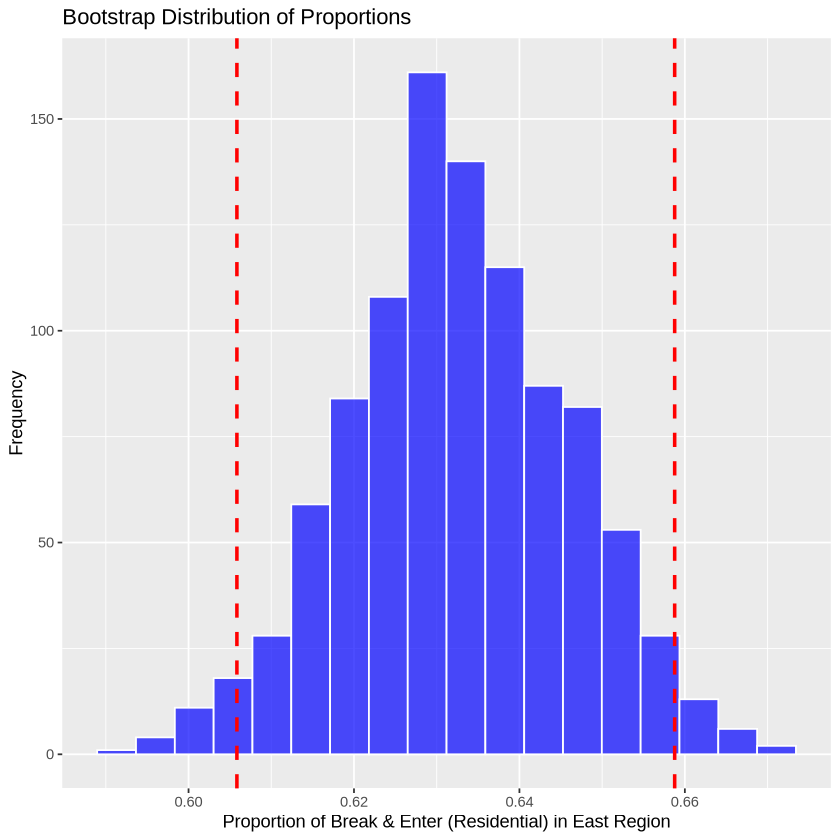

In [36]:
# Plot the histogram of proportions
ggplot(props_btsp_ci_res, aes(x = proportion)) +
  geom_histogram(bins = 18, fill = "blue", color = "white", alpha = 0.7) +
  labs(title = "Bootstrap Distribution of Proportions",
       x = "Proportion of Break & Enter (Residential) in East Region",
       y = "Frequency") +
  
  # Add vertical lines for the confidence intervals
  geom_vline(xintercept = ci_intervals_res$ci_lower, linetype = "dashed", color = "red", size = 1) +
  geom_vline(xintercept = ci_intervals_res$ci_upper, linetype = "dashed", color = "red", size = 1) 

In [37]:
set.seed(123)

# Generate bootstrap samples and calculate proportions
props_btsp_ci_com <- 
  crime_com %>%
  rep_sample_n(size = 1985, reps = 1000, replace = TRUE) %>%
  group_by(replicate) %>%
  summarise(n_rows_east = sum(REGION == "East"), 
            proportion = n_rows_east / n()) 

# Calculate 95% confidence intervals
ci_intervals_com <- props_btsp_ci_com %>%
  summarise(ci_lower = quantile(proportion, 0.025), 
            ci_upper = quantile(proportion, 0.975))
ci_intervals_com

ci_lower,ci_upper
<dbl>,<dbl>
0.6569144,0.6967254


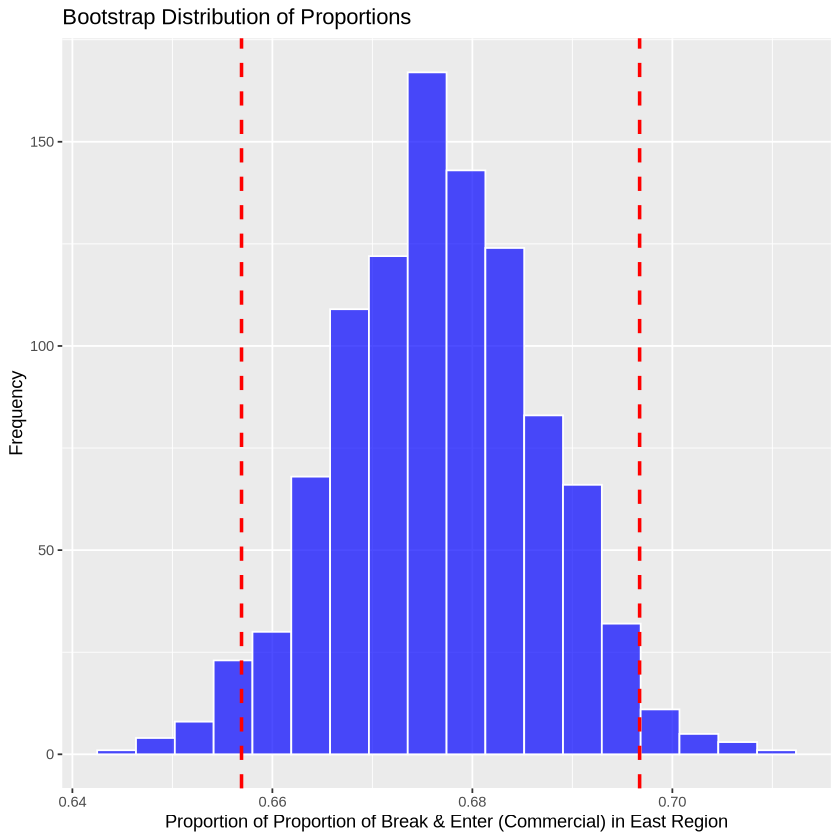

In [38]:
# Plot the histogram of proportions
ggplot(props_btsp_ci_com, aes(x = proportion)) +
  geom_histogram(bins = 18, fill = "blue", color = "white", alpha = 0.7) +
  labs(title = "Bootstrap Distribution of Proportions",
       x = "Proportion of Proportion of Break & Enter (Commercial) in East Region",
       y = "Frequency") +
  
  # Add vertical lines for the confidence intervals
  geom_vline(xintercept = ci_intervals_com$ci_lower, linetype = "dashed", color = "red", size = 1) +
  geom_vline(xintercept = ci_intervals_com$ci_upper, linetype = "dashed", color = "red", size = 1) 

In [39]:
set.seed(123)

# Generate bootstrap samples and calculate proportions
props_btsp_ci_mis <- 
  crime_mis %>%
  rep_sample_n(size = 5614, reps = 1000, replace = TRUE) %>%
  group_by(replicate) %>%
  summarise(n_rows_east = sum(REGION == "East"), 
            proportion = n_rows_east / n()) 
# Calculate 95% confidence intervals

In [40]:
ci_intervals_mis <- props_btsp_ci_mis %>%
  summarise(ci_lower = quantile(proportion, 0.025), 
            ci_upper = quantile(proportion, 0.975))

ci_intervals_mis

ci_lower,ci_upper
<dbl>,<dbl>
0.7634485,0.7855406


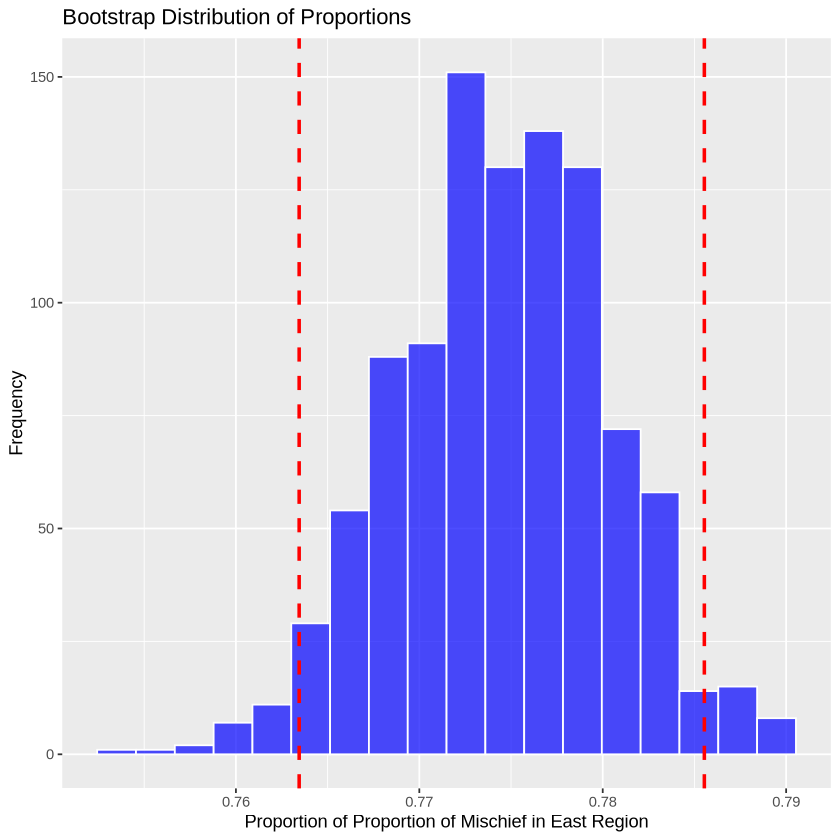

In [41]:

# Plot the histogram of proportions
ggplot(props_btsp_ci_mis, aes(x = proportion)) +
  geom_histogram(bins = 18, fill = "blue", color = "white", alpha = 0.7) +
  labs(title = "Bootstrap Distribution of Proportions",
       x = "Proportion of Proportion of Mischief in East Region",
       y = "Frequency") +
  
  # Add vertical lines for the confidence intervals
  geom_vline(xintercept = ci_intervals_mis$ci_lower, linetype = "dashed", color = "red", size = 1) +
  geom_vline(xintercept = ci_intervals_mis$ci_upper, linetype = "dashed", color = "red", size = 1) 


### P-values based on bootstraping

---

In [42]:
props_btsp_ci_res %>%
  mutate(right = proportion >= 0.67) %>%
  summarise(p_value_BE_res = sum(right)/1000)

p_value_BE_res
<dbl>
0.001


In [43]:
props_btsp_ci_com %>%
  mutate(right = proportion >= 0.67) %>%
  summarise(p_value_BE_com = sum(right)/1000)

p_value_BE_com
<dbl>
0.757


In [44]:
props_btsp_ci_mis %>%
  mutate(right = proportion >= 0.67) %>%
  summarise(p_value_mischief = sum(right)/1000)

p_value_mischief
<dbl>
1


## Discussion
Based on the results from our hypothesis testing, we can see that both the theory-based approach and the bootstrapping method prove that our initial expectations were correct. 
In the future, this data can be used to explore in more detail the underlying factors contributing to higher crime rates in the East than in the West, such as poverty, homelessness and socioeconomic conditions. Some other questions that may be asked are whether the trend of the Eastside having higher crimes has been consistent throughout Vancouver’s history and whether the trend of the Eastside having more crime applies to cities in general and not just Vancouver. 
Another point to be raised is that our separation between East and West is arbitrary, being Granville Street, which raises questions on the thoroughness of our analysis. Perhaps the proportions of crime in the East are higher since more people live east of Granville Street. We expected to find that the level of residential break-ins would be more than twice as high in the East as well but this was not the case. This could be due to fewer residential properties on the Westside. Factors such as property value should be also considered as breaking into more expensive properties will generally have items of more value. Either way, a more rigid and accurate approach beyond this report’s scope would be to look at per capita crime rates based on population, number of properties and property value instead of just looking at overall proportions.
Another explanation of our results could be that the higher proportions of mischief and commercial break-ins compared to residential break-ins on the Eastside may be because most of Downtown is east of Granville. This would make sense since most commercial property is concentrated in Downtown Vancouver and there are generally more people there per square kilometer especially during evenings on weekends. Future improvements would be to analyze each neighbourhood instead of making a sweeping generalization by splitting the city into two parts. We may even find that some neighbourhoods in the Eastside are safer than some parts of the Westside.



## References

Staysafevancouver. (2023, August 31). Vancouver crime rate: Areas to avoid. Stay Safe Vancouver. https://www.staysafevancouver.com/post/vancouver-crime-rate 

West side rated safer than East Side neighbourhoods: Vancouver police survey. The Georgia Straight. (2019, February 21). https://www.straight.com/news/1203621/west-side-rated-safer-east-side-neighbourhoods-vancouver-police-survey 
